<a href="https://colab.research.google.com/github/sadrireza/Neural-Networks/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regression

In [32]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#1- Data Preparation

In [33]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [34]:
train_data.shape

(404, 13)

In [14]:
train_data[0]
#it is not normalized

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [15]:
train_labels[0]

15.2

In [35]:
#we need to normalize train data
#we use this formula as a common method for normalization (x-mean)/var
mean = train_data.mean(axis=0) #axis=0 means that we normalize along each item only
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [36]:
std = train_data.std(axis=0)
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [37]:
#normalization
train_data -= mean
train_data /= std
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

#2- Model Design

In [38]:
def build_model():
  model = Sequential([
      layers.Dense(64, activation = 'relu' , input_shape = (13,)),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
        ])

  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

In [39]:
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

#3- Training

In [40]:
#no. of train data is very small
history = model.fit(x = train_data, y = train_labels, batch_size = 16,
          epochs = 20, validation_split = 0.2)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 589.9919 - mae: 21.9356 - val_loss: 534.5327 - val_mae: 21.0327
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 445.8863 - mae: 18.5011 - val_loss: 413.4649 - val_mae: 18.0347
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 345.8777 - mae: 15.8721 - val_loss: 271.6215 - val_mae: 14.2015
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 176.1457 - mae: 11.3813 - val_loss: 148.7630 - val_mae: 9.7532
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94.4871 - mae: 7.5672 - val_loss: 77.9208 - val_mae: 6.5793
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.4316 - mae: 5.9467 - val_loss: 53.4786 - val_mae: 5.2917
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.1509 - mae: 4.7487 - val_loss: 38.4618 - val_mae: 4.4232
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.0482 - mae: 4.5229 - val_loss: 30.5578 - val_mae: 3.8916
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s

In [41]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

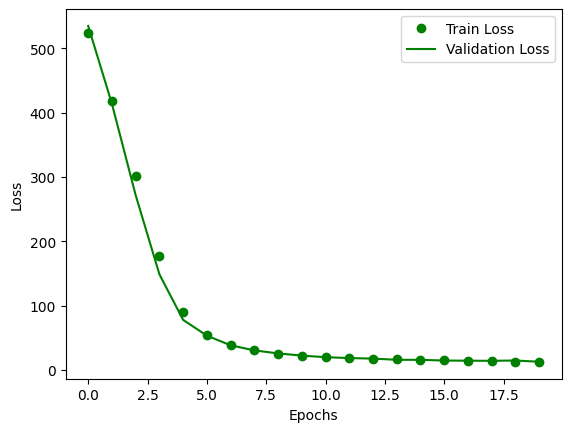

In [42]:
losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses, 'go', label = 'Train Loss')
plt.plot(val_losses,'g', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

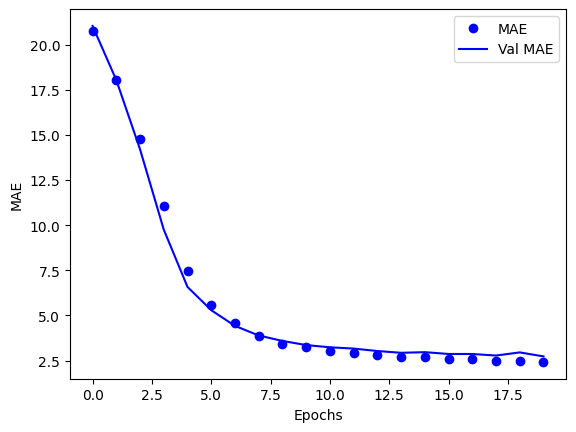

In [43]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(mae, 'bo', label = 'MAE')
plt.plot(val_mae, 'b', label = 'Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

#4- Evaluation

In [44]:
model.evaluate(train_data, train_labels)
#2.3 as for mae is a big number. we can see it also on the plot

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3498 - mae: 2.3022 


[12.180424690246582, 2.3950555324554443]

In [45]:
model.evaluate(test_data, test_labels)
#very strange numbers. something is wrong
#solution: model is trained with normalized data. so we have to use normalized data here

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5485922.0000 - mae: 2297.4106 


[5520899.0, 2303.55029296875]

In [46]:
#test data normalization
test_data -= mean
test_data /= std

In [47]:
model.evaluate(test_data, test_labels)
#problem solved
#why answer is worse than train data? because test data are fewer and its normal

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.4448 - mae: 2.8377 


[19.16341209411621, 3.0469677448272705]